Shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose      

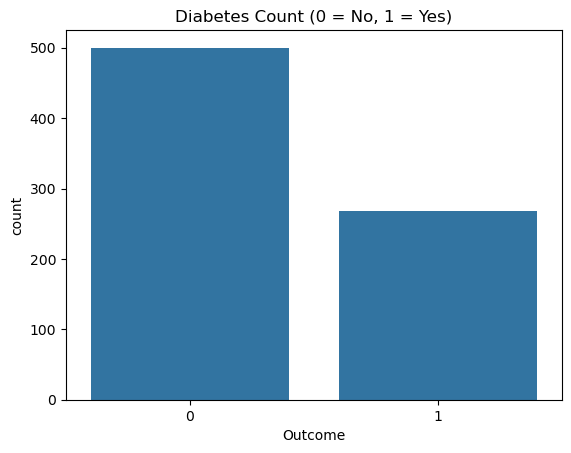

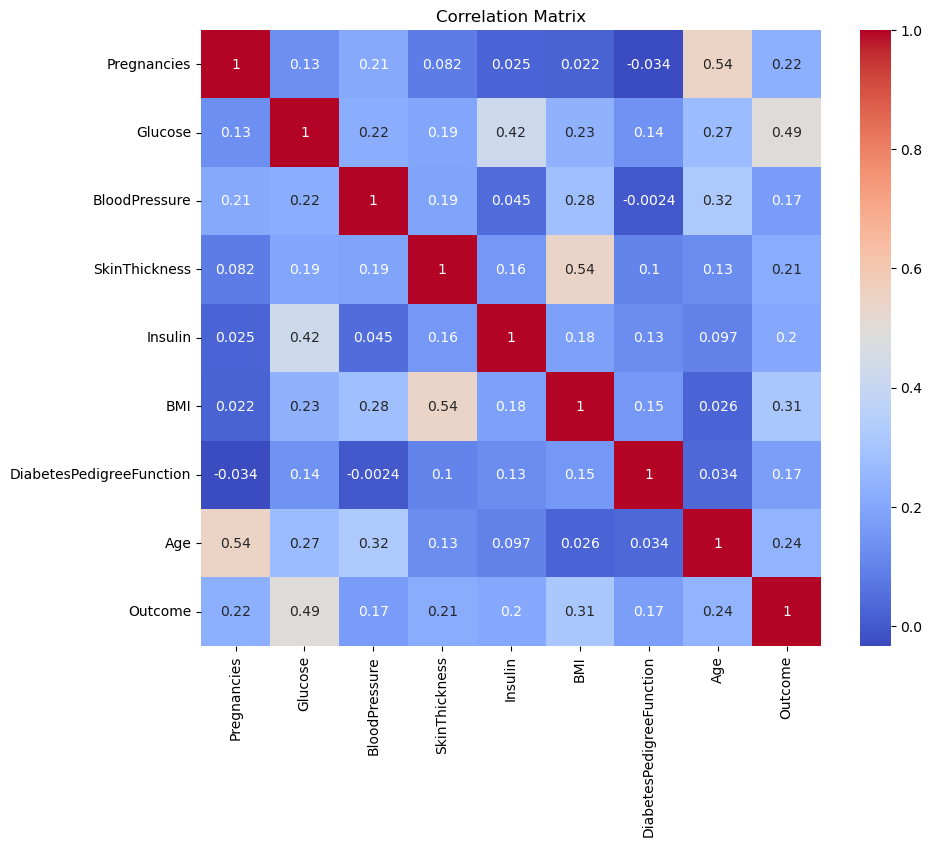

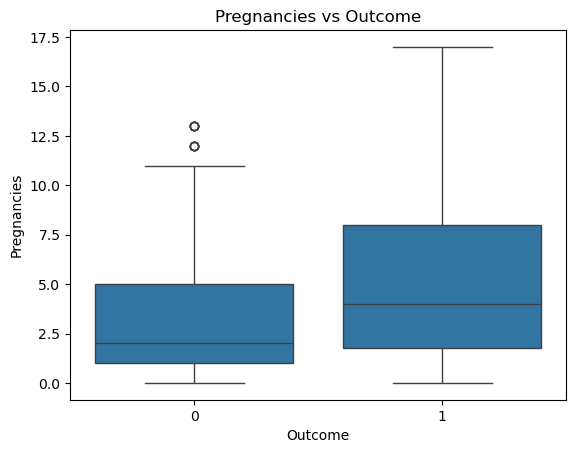

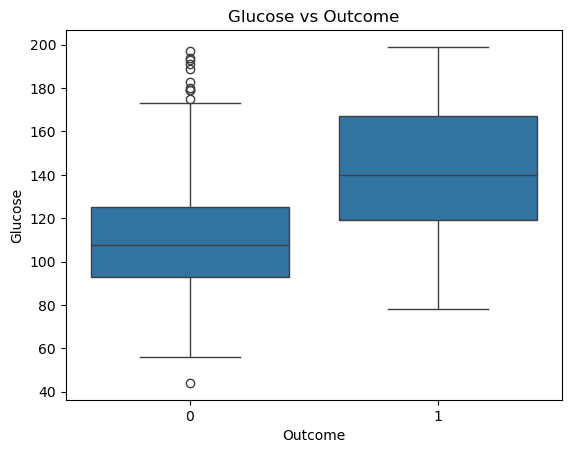

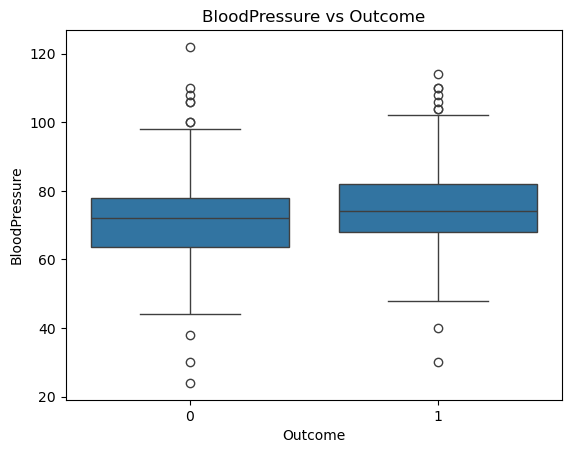

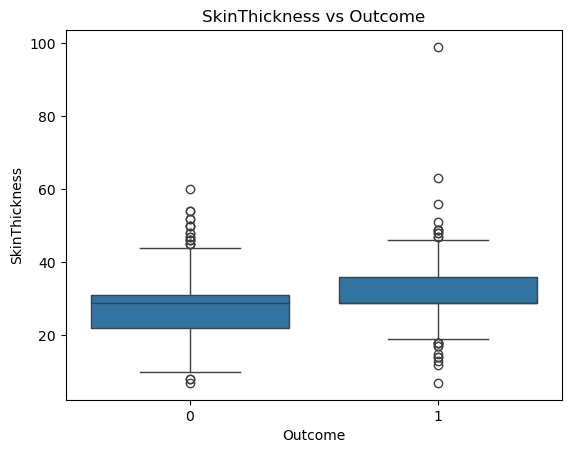

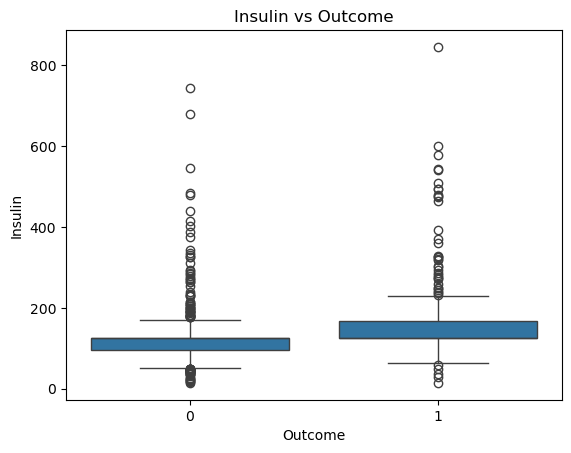

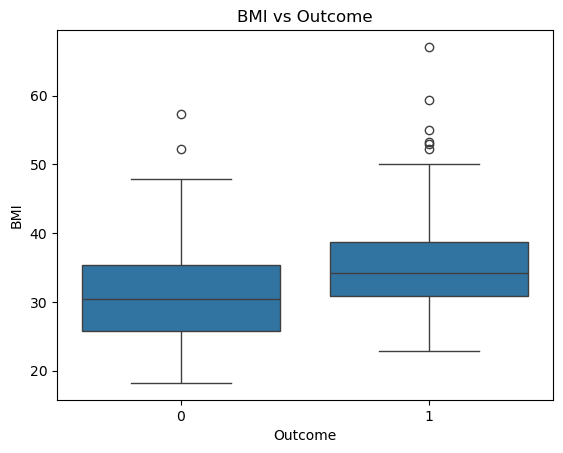

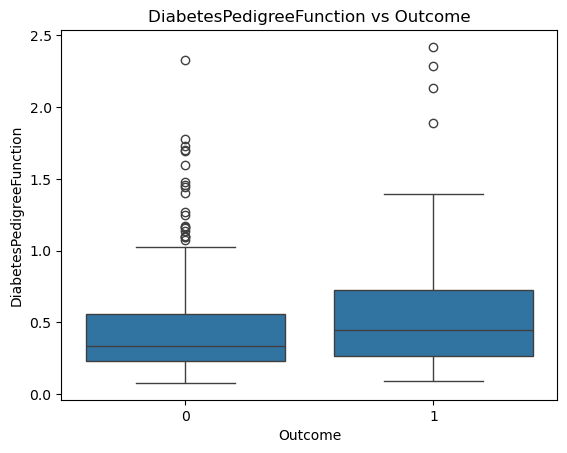

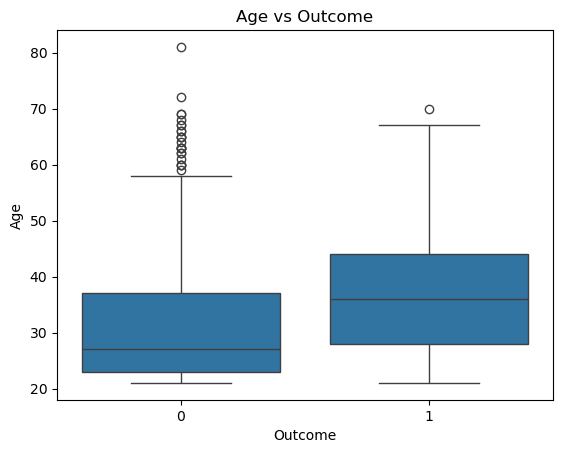

Group Mean:
          Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.682000      70.920000      27.726000  127.792000   
1           4.865672  142.130597      75.123134      31.686567  164.701493   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.885600                  0.429734  31.190000  
1        35.383582                  0.550500  37.067164  
Accuracy: 0.8051948051948052
confusion matrix:
 [[93 14]
 [16 31]]


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('diabetes.csv')  # Make sure the CSV file is in the working directory

# Show basic info
print("Shape:", df.shape)
print(df.head())
print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())

# Replace invalid 0s with NaN in specific columns
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Show missing values after replacement
print("Missing values after replacing 0s:\n", df.isnull().sum())

# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Check again
print("Missing values after filling:\n", df.isnull().sum())

# Countplot of Outcome
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Count (0 = No, 1 = Yes)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Boxplots for each feature vs Outcome
for col in df.columns[:-1]:
    sns.boxplot(data=df, x='Outcome', y=col)
    plt.title(f'{col} vs Outcome')
    plt.show()

# Mean values of features grouped by Outcome
print("Group Mean:\n", df.groupby('Outcome').mean())

# Split dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Logistic Regression Accuracy: 0.8116883116883117
Confusion Matrix:
 [[97 10]
 [19 28]]


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle  # for saving the model

# Load and prepare your dataset (assuming df is already cleaned)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the model to a pickle file
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

print("Model saved as 'logistic_model.pkl'")


Logistic Regression Accuracy: 0.8116883116883117
Confusion Matrix:
 [[97 10]
 [19 28]]
Model saved as 'logistic_model.pkl'


In [ ]:
import subprocess

def get_diet_recommendation(name, age, gender, weight, height, diabetic_status):
    prompt = f"""
You are a medical AI assistant. Provide a personalized diet and lifestyle recommendation 
for the following individual. Include a sample one-day meal plan and general health tips.

Name: {name}
Age: {age}
Gender: {gender}
Weight: {weight} kg
Height: {height} cm
Diabetic: {"Yes" if diabetic_status else "No"}

Output format:
1. Summary of condition
2. Personalized diet recommendation
3. Sample one-day meal plan (Breakfast, Lunch, Dinner, Snacks)
4. Exercise & lifestyle tips
"""

    # ✅ Make sure this path is correct on your PC
    ollama_path = r"C:\Users\Ananya\AppData\Local\Programs\Ollama\ollama.exe"

    # Run the ollama model locally
    result = subprocess.run(
        [ollama_path, "run", "llama3", prompt],
        capture_output=True,
        text=True
    )

    return result.stdout.strip()

# ✅ Entry point
if __name__ == "__main__":
    name = "Ananya"
    age = 22
    gender = "Female"
    weight = 65
    height = 165
    diabetic_status = True

    recommendation = get_diet_recommendation(name, age, gender, weight, height, diabetic_status)
    print("\n📝 Personalized Recommendation:\n")
    print(recommendation)
